# Gender Detection

Bu projemizde kadın erkek tahmin modeli olusturacağız. Önce sadece  kendi yüklediğimiz fotograflarla sonra Transfer learning (VGG16) kullanarak modelimiz eğiteceğiz

<img src="https://aicoolhub.com/wp-content/uploads/2024/09/gender.webp" width=800>

<a href="https://www.kaggle.com/datasets/trainingdatapro/gender-detection-and-classification-image-dataset">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import cv2
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
os.listdir("train")

['men', 'women']

In [3]:
img_path="train/"
labels=os.listdir("train")

In [4]:
#Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):       #Klasörün içindeki alt klasörleri söyler
        img_list.append(img_path+label+"/"+img_file)  #apppend dizinin sonuna eklme yapıyor
        label_list.append(label)

In [5]:
df=pd.DataFrame({"img":img_list,"label":label_list})

In [6]:
df.head()

,img,label
0,train/men/0.jpg,men
1,train/men/1.jpg,men
2,train/men/10.jpg,men
3,train/men/100.jpg,men
4,train/men/101.jpg,men


In [7]:
d={'men':1,'women':0}

In [8]:
df["encode_label"]=df["label"].map(d)

In [9]:
df.sample(5)

,img,label,encode_label
91,train/men/46.jpg,men,1
191,train/women/135.jpg,women,0
278,train/women/8.jpg,women,0
192,train/women/136.jpg,women,0
77,train/men/33.jpg,men,1


In [10]:
x=[]
for img in df["img"]:
    img=cv2.imread(img)
    img=cv2.resize(img,(150,150))
    img=img/255
    x.append(img)

In [11]:
x=np.array(x)

In [12]:
y=df["encode_label"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [15]:
model=Sequential()
model.add(Input(shape=(150,150,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [16]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.5468 - loss: 26.1092 - val_accuracy: 0.4833 - val_loss: 8.8586
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.7319 - loss: 21.2858 - val_accuracy: 0.5167 - val_loss: 6.0731
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.8563 - loss: 5.6832 - val_accuracy: 0.5000 - val_loss: 1.1042
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.9009 - loss: 3.5406 - val_accuracy: 0.5167 - val_loss: 11.2520
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.8739 - loss: 4.6707 - val_accuracy: 0.5000 - val_loss: 4.8201
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.8859 - loss: 3.1802 - val_accuracy: 0.4833 - val_loss: 4.3572
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.9470 - loss: 1.8651 - val_accuracy: 0.5167 - val_loss: 3.9736
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.9410 - loss: 1.6324 - val_accuracy: 0.5167 - val_lo

In [17]:
def yb(img):
    img=cv2.imread(img)
    img=cv2.resize(img,(150,150))
    img=img/255
    img=np.expand_dims(img,axis=0)  # Modelin boyutunu arttırıyor
    return img

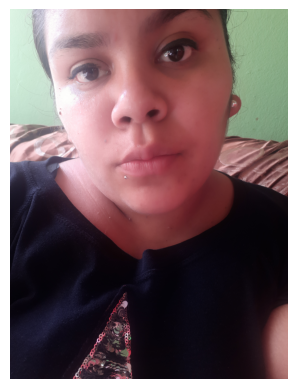

In [18]:
image_path = "train/women/74.jpg"  # Görüntü dosyasının yolu
img = cv2.imread(image_path)  # Görüntüyü yükleme
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler; RGB'ye dönüştürelim
plt.imshow(img)# Görüntüyü gösterme
plt.axis('off')  # Eksenleri gizleme
plt.show()

In [19]:
image=yb("train/women/74.jpg")

In [20]:
prediction=model.predict(image)
predicted_class=np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


In [21]:
predicted_class

0

In [22]:
# d={'men':1,'women':0}

In [23]:
model.save("cinsiyet.h5")

### VGG16 ile

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50,Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Tek satırda resimlerin tamamını okumaya yarıyor

In [25]:
data_dir="train"
img_width,img_height=224,224

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="training")

test_datagen=ImageDataGenerator( rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="validation")

base_model=VGG16(weights="imagenet", input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation="relu")) # Dense nöronları birbirine bağlar
model.add(Dense(4,activation="softmax"))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/10


C:\Users\erkan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.3513 - loss: 8.5027 - val_accuracy: 0.7500 - val_loss: 1.2757
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.7424 - loss: 1.8899 - val_accuracy: 0.6333 - val_loss: 1.4536
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.7765 - loss: 1.5669 - val_accuracy: 0.7667 - val_loss: 1.3596
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.8976 - loss: 0.3081 - val_accuracy: 0.7500 - val_loss: 1.5511
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.9215 - loss: 0.3271 - val_accuracy: 0.8000 - val_loss: 0.5970
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.9793 - loss: 0.0425 - val_accuracy: 0.8333 - val_loss: 0.6848
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 164s 5s/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 0.7667 - val_loss: 1.0132
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.9891 - loss: 0.0246 - val_accuracy: 0.8000 - val_loss: 1.2536
Epoch 9/10
8/8 ━━━

In [26]:
model.save("cinsiyet_2.h5")

Modelimiz CNN ve transfer learning kullnarak eğittik ve streamlit uygulaması yapmak üzere kaydettik